# Patrick Tutka

# HW
Use the cancer data used below (or the first two columns of the iris data set) - for bonus, bring your own data set
Normalize, test-train split the data
Train models from SVM (linear and rbf kernels), LogRegression (2 values of C), KNN (3 neighbor values)
Create two tables, one for train, one for test - that represent the Model, description, Precision, Recall, f1 score on each line
Pick one of the Models and show the feature importance.

Research webpage with attribute detail. 
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, svm
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.preprocessing
from sklearn import linear_model, datasets
from sklearn import svm, datasets
import pandas as pd
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve)
import seaborn as sns

In [143]:
trainingdf

,Model,Precision,Recall,F1 Score
0,SVM_Linear,0.99,0.96,0.98
1,SVM_rbf,1.00,0.87,0.93
2,Logistic_Regression C_1,1.00,0.91,0.95
3,Logistic_Regression C_3,0.99,0.95,0.97
4,KNN_5,0.98,0.96,0.97
5,KNN_10,0.99,0.95,0.97
6,KNN_15,0.98,0.94,0.96


Table 1 summarizes the metrics for seven classification models that attempt to predict malignant breast cancer tumors. The metric parameters recorded were precision, recall, and F1 score. The model implemented a 70-30 train/test split and the above table represents metrics for the training data predicting malignant tumors. In addition, the data has been rescaled using the MinMaxScaler algorithm to transform the independent feature values to 0 to 1. Values classified as "1" were classified as malignent represented by the Y variable. Both logisitic regression C=3.0 and KNN with 5 nearest neighbors performed very well but I choose logisitic regression as the best training and test model. The below histogram represents important features that the model used to predict malignant tumors as "1". Bars moving to the right represent features that are strong predictors for cancer. Longer bars represent the strongest predictors for cancer.  

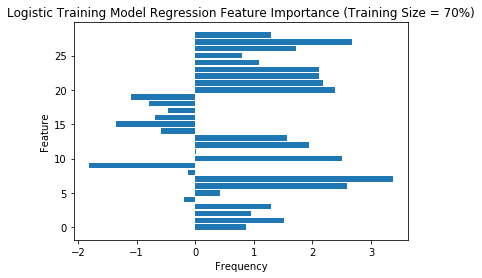

In [145]:
coef1 = logReg3.coef_[0]
plt.barh(list(range(coef1.shape[0])), coef1, align='center')
# plt.yticks(range(len(X.columns)), X.columns)
plt.title("Logistic Training Model Regression Feature Importance (Training Size = 70%)")
plt.xlabel("Frequency")
plt.ylabel("Feature")
plt.show()

In [144]:
testdf

,Model,Precision,Recall,F1 Score
0,SVM_Linear,1.00,0.91,0.95
1,SVM_rbf,1.00,0.79,0.88
2,Logistic_Regression C_1,0.98,0.84,0.91
3,Logistic_Regression C_3,1.00,0.91,0.95
4,KNN_5,1.00,0.95,0.97
5,KNN_10,1.00,0.88,0.93
6,KNN_15,1.00,0.88,0.93


Table 2 summarizes the metrics for seven classification models that attempt to predict breast cancerbased on 30% test data. Logisitc regression C=3.0 and KNN_5 once again performed very well in predicting malignant tumors. The below histogram represents features that the model thought were important in predicting malignant tumors. Bars moving to the right represent features that are good predictors for cancer. 

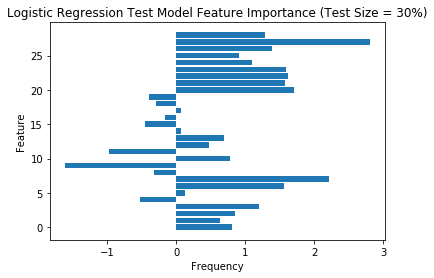

In [146]:
coef2 = logReg4.coef_[0]
plt.barh(list(range(coef2.shape[0])), coef2, align='center')
plt.title("Logistic Regression Test Model Feature Importance (Test Size = 30%)")
plt.xlabel("Frequency")
plt.ylabel("Feature")
plt.show()


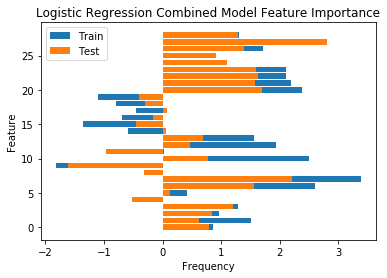

In [153]:
coef2 = logReg4.coef_[0]
plt.barh(list(range(coef1.shape[0])), coef1, align='center', label='Train')
plt.barh(list(range(coef2.shape[0])), coef2, align='center', label='Test')
plt.legend()
plt.title("Logistic Regression Combined Model Feature Importance")
plt.xlabel("Frequency")
plt.ylabel("Feature")
plt.show()

In [4]:
cancer = pd.read_csv('C:\JHU_Python\data/wdbc.data', header=None)

In [5]:
cancer[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [6]:
Y = (cancer[1]=='M').astype(int) #this creates the Y depended classification variable based on the M "malignant"
X = cancer[[*range(2,31)]] #this creates a matrix of X variables based on the columns between columns 2 and 31. I will train test these variables againsts Y. 

In [7]:
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=.7) # 70/30 Train test split

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
cancer_svm1 = svm.SVC(kernel = 'linear')

In [11]:
cancer_svm1.fit(x_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
print(classification_report(y_train1, cancer_svm1.predict(x_train1))) #train statisitics linear
print(confusion_matrix(y_train1, cancer_svm1.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       243
          1       0.99      0.96      0.98       155

avg / total       0.98      0.98      0.98       398

[[242   1]
 [  6 149]]


In [13]:
cancer_svm2 = svm.SVC(kernel = 'linear')

In [14]:
cancer_svm2.fit(x_test1, y_test1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print(classification_report(y_test1, cancer_svm2.predict(x_test1))) #test statisitics linear
print(confusion_matrix(y_test1, cancer_svm2.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       114
          1       1.00      0.91      0.95        57

avg / total       0.97      0.97      0.97       171

[[114   0]
 [  5  52]]


# Radial basis function kernel

In [16]:
cancer_svm_rbf1 = svm.SVC(kernel = 'rbf')

In [17]:
cancer_svm_rbf1.fit(x_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
print(classification_report(y_train1, cancer_svm_rbf1.predict(x_train1))) #train statisitics rbf
print(confusion_matrix(y_train1, cancer_svm_rbf1.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96       243
          1       1.00      0.87      0.93       155

avg / total       0.95      0.95      0.95       398

[[243   0]
 [ 20 135]]


In [19]:
cancer_svm_rbf2 = svm.SVC(kernel = 'rbf')

In [20]:
cancer_svm_rbf2.fit(x_test1, y_test1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
print(classification_report(y_test1, cancer_svm_rbf2.predict(x_test1))) #test statistics rbf
print(confusion_matrix(y_test1, cancer_svm_rbf2.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95       114
          1       1.00      0.79      0.88        57

avg / total       0.94      0.93      0.93       171

[[114   0]
 [ 12  45]]


# Logisitic Regression C=1.0

In [22]:
logReg1 = LogisticRegression(C=1.0)

In [23]:
logReg1.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
pred1 = logReg1.predict(x_train1)

In [25]:
print(classification_report(y_train1, logReg1.predict(x_train1))) #train statisitics logisitic reg
print(confusion_matrix(y_train1, logReg1.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       243
          1       1.00      0.91      0.95       155

avg / total       0.97      0.96      0.96       398

[[243   0]
 [ 14 141]]


In [26]:
logReg2 = LogisticRegression(C=1.0)

In [149]:
logReg2.fit(x_test1, y_test1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print(classification_report(y_test1, logReg2.predict(x_test1))) #train statisitics rbf
print(confusion_matrix(y_test1, logReg2.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       114
          1       0.98      0.84      0.91        57

avg / total       0.94      0.94      0.94       171

[[113   1]
 [  9  48]]


# Logisitic Regression C=3.0

In [29]:
logReg3 = LogisticRegression(C=3.0)

In [30]:
logReg3.fit(x_train1, y_train1)

LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logReg4 = LogisticRegression(C=3.0)

In [32]:
logReg4.fit(x_test1, y_test1)

LogisticRegression(C=3.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print(classification_report(y_train1, logReg3.predict(x_train1))) #train statisitics
print(confusion_matrix(y_train1, logReg3.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       243
          1       0.99      0.95      0.97       155

avg / total       0.98      0.98      0.98       398

[[241   2]
 [  7 148]]


In [34]:
print(classification_report(y_test1, logReg4.predict(x_test1))) 
print(confusion_matrix(y_test1, logReg4.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       114
          1       1.00      0.91      0.95        57

avg / total       0.97      0.97      0.97       171

[[114   0]
 [  5  52]]


# K-Neariest Neighbors n-neighbors=5

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
classifier = KNeighborsClassifier(n_neighbors=5)
class1=classifier.fit(x_train1, y_train1)
y_pred = classifier.predict(x_test1)

In [37]:
print(classification_report(y_train1, classifier.predict(x_train1))) #train statisitics
print(confusion_matrix(y_train1, classifier.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       243
          1       0.98      0.96      0.97       155

avg / total       0.98      0.98      0.98       398

[[240   3]
 [  6 149]]


In [140]:
classifier2 = KNeighborsClassifier(n_neighbors=5)
class2 = classifier2.fit(x_test1, y_test1)
print(classification_report(y_test1, classifier2.predict(x_test1))) #test statisitics
print(confusion_matrix(y_test1, classifier2.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       114
          1       1.00      0.95      0.97        57

avg / total       0.98      0.98      0.98       171

[[114   0]
 [  3  54]]


# K-Neariest Neighbors n-neighbors=10

In [39]:
classifier3 = KNeighborsClassifier(n_neighbors=10)
classifier3.fit(x_train1, y_train1)
y_pred = classifier3.predict(x_test1)
print(classification_report(y_train1, classifier3.predict(x_train1))) #train statisitics
print(confusion_matrix(y_train1, classifier3.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       243
          1       0.99      0.95      0.97       155

avg / total       0.98      0.98      0.98       398

[[242   1]
 [  8 147]]


In [101]:
classifier4 = KNeighborsClassifier(n_neighbors=10)
classifier4.fit(x_test1, y_test1)

print(classification_report(y_test1, classifier4.predict(x_test1))) #test statisitics
print(confusion_matrix(y_test1, classifier4.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       114
          1       1.00      0.88      0.93        57

avg / total       0.96      0.96      0.96       171

[[114   0]
 [  7  50]]


# K-Neariest Neighbors n-neighbors=15

In [102]:
classifier5 = KNeighborsClassifier(n_neighbors=15)
classifier5.fit(x_train1, y_train1)

print(classification_report(y_train1, classifier5.predict(x_train1))) #train statisitics
print(confusion_matrix(y_train1, classifier5.predict(x_train1)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       243
          1       0.98      0.94      0.96       155

avg / total       0.97      0.97      0.97       398

[[240   3]
 [  9 146]]


In [103]:
classifier6 = KNeighborsClassifier(n_neighbors=15)
classifier6.fit(x_test1, y_test1)

print(classification_report(y_test1, classifier6.predict(x_test1))) #train statisitics
print(confusion_matrix(y_test1, classifier6.predict(x_test1)))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       114
          1       1.00      0.88      0.93        57

avg / total       0.96      0.96      0.96       171

[[114   0]
 [  7  50]]


In [43]:
df = pd.DataFrame(columns=['SVM_Linear','SVM_rbf','Logistic_Regression_C_3','Logistic_Regression_C_3','KNN_5','KNN_10','KNN_15'])

In [104]:
trainingdf = pd.read_csv('C:\JHU_Python\data/trainingdata.csv', index_col=None)

In [105]:
trainingdf

,Model,Precision,Recall,F1 Score
0,SVM_Linear,0.99,0.96,0.98
1,SVM_rbf,1.00,0.87,0.93
2,Logistic_Regression C_1,1.00,0.91,0.95
3,Logistic_Regression C_3,0.99,0.95,0.97
4,KNN_5,0.98,0.96,0.97
5,KNN_10,0.99,0.95,0.97
6,KNN_15,0.98,0.94,0.96


Table 1 summarizes the metrics for seven classification models that attempt to predict breast cancer. The metric parameters recorded were precision, recall, and F1 score. The models implemented a 70-30 train/test split and the above table represents metrics for the training data. Additionally the data has been rescaled using the MinMaxScaler algorithm to transform the independent X variables values to 0 to 1. Values classified as "1" were classified as malignent as represented by the Y variable. Both logisitic regression C=3.0 and KNN with 5 nearest neighbors performed very well but I choose logisitic regression as the best training and test model. 

In [106]:
testdf = pd.read_csv('C:\JHU_Python\data/testdata.csv', index_col=None)

In [107]:
testdf

,Model,Precision,Recall,F1 Score
0,SVM_Linear,1.00,0.91,0.95
1,SVM_rbf,1.00,0.79,0.88
2,Logistic_Regression C_1,0.98,0.84,0.91
3,Logistic_Regression C_3,1.00,0.91,0.95
4,KNN_5,1.00,0.95,0.97
5,KNN_10,1.00,0.88,0.93
6,KNN_15,1.00,0.88,0.93


Table 2 summarizes the metrics for seven classification models that attempt to predict breast cancer. The metric parameters recorded were precision, recall, and F1 score. The models implemented a 70-30 train/test split. The above table represents metrics for the 30% test data. Linear SVM, logisitic regression, and KNN_5 performed very well. 

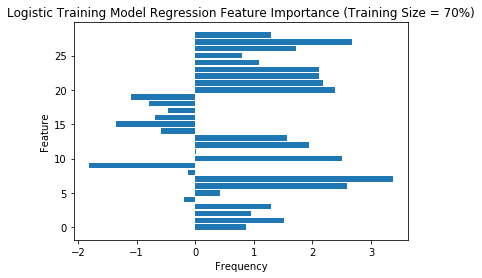

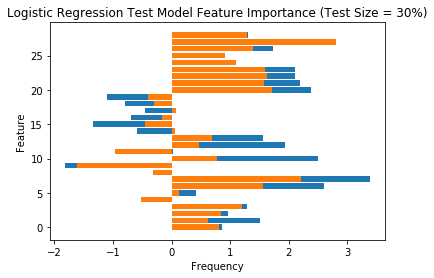

In [151]:
coef2 = logReg4.coef_[0]
plt.barh(list(range(coef1.shape[0])), coef1, align='center')
plt.barh(list(range(coef2.shape[0])), coef2, align='center')
plt.title("Logistic Regression Test Model Feature Importance (Test Size = 30%)")
plt.xlabel("Frequency")
plt.ylabel("Feature")
plt.show()


In [147]:
cancer

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
